Importing the necessary python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the data


In [3]:
data = pd.read_csv('car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


Checking for null values

In [4]:
data.isna().sum()

Year     0
Price    0
dtype: int64

Printing the column names

In [5]:
data.columns

Index(['Year', 'Price'], dtype='object')

Assigning each column to it's appropriate variable

In [7]:
x = data['Year']
y = data['Price']

Scatter plotting the data

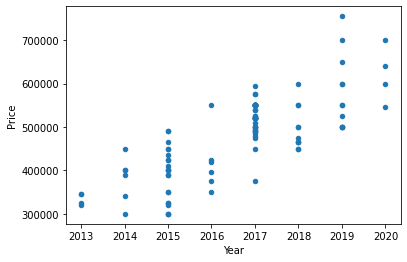

In [8]:
data.plot.scatter(x = 'Year', y = 'Price')
plt.show()

Calculating the regression line

In [9]:
def linear_regression(x,y):
  N = len(x)
  x_mean = x.mean()
  y_mean = y.mean()

  B1_num = ((x - x_mean) * (y - y_mean)).sum()
  B1_den = ((x - x_mean)**2).sum()
  B1 = B1_num / B1_den

  B0 = y_mean - (B1*x_mean)

  reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))

  return (B0, B1, reg_line)

Applying linear regression() function to the dataset

In [10]:
linear_regression(data['Year'],data['Price'])

(-87147246.05488417, 43453.37988792974, 'y = -87147246.05488417 + 43453.38β')

Calculating how well the regression line fits

In [11]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [12]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = -87147246.05488417 + 43453.38β
Correlation Coef.:  0.7763021386419315
"Goodness of Fit":  0.6026450104600367


Plotting the Regression Line

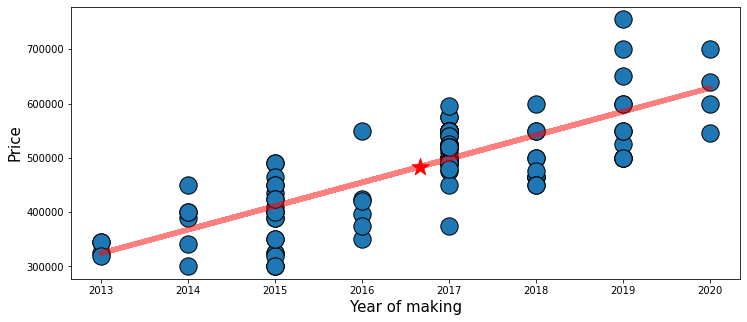

In [13]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
plt.xlabel('Year of making', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r')
plt.show()

Defining the predict() function to apply on new data

In [14]:
def predict(B0,B1,new_x):
  y = B0 + B1 * new_x
  return y

Predicting the possible price of a 2022 model secondhand Grand i10 car

In [15]:
predict(-87147246.05488417,43453.37988792974,2022)

715488.0785097629

CREATING THE LINEAR REGRESSION MODEL

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('car_age_price.csv')
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [18]:
df.isna().sum()

Year     0
Price    0
dtype: int64

Checking for the information of the dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


Printing statistical summary

In [20]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


Plotting the data as a histogram to see the distribution

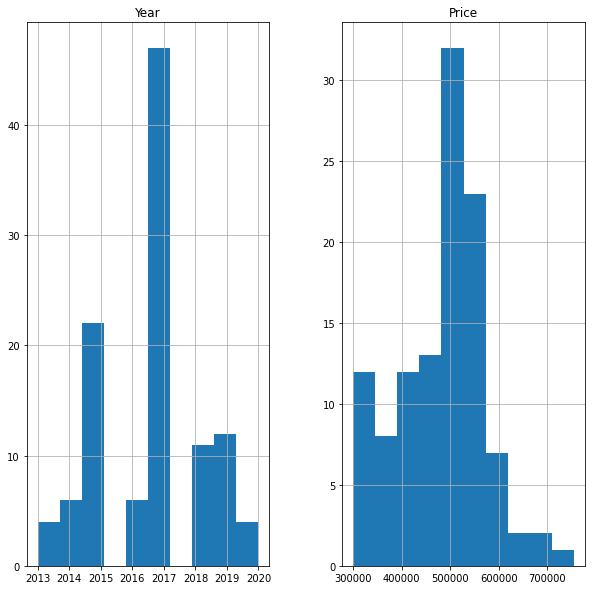

In [21]:
freq_graph = df.select_dtypes(include = int)
freq_graph.hist(figsize = [10,10])
plt.show()

Checking for correlation coefficient

In [22]:
df.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


Assigning each columns to it's appropriate variable

In [23]:
x = df['Year'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

Splitting the data for train and test

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = 0.2)

Creating the Linear Regression model

In [25]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model = linear_regression.fit(x_train,y_train)
predictions = model.predict(x_test)

Analyzing the performance of the model

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean Squared Error = ', mean_squared_error(y_test,predictions))
print('R squared value = ', r2_score(y_test,predictions))

Mean Squared Error =  4326906256.829671
R squared value =  0.36759313425902185


CREATING THE LASSO REGRESSION MODEL

In [27]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(x_train, y_train)

Lasso(alpha=1)

Analyzing the performance of the Lasso Regression Model

In [30]:
print('R squared value = ', round(reg.score(x_test, y_test)*100, 2))

R squared value =  36.76


In [31]:
from sklearn.metrics import mean_squared_error
pred = reg.predict(x_test)
mse_test =mean_squared_error(y_test, pred)
print('Mean squared error = ', round(mse_test, 2))

Mean squared error =  4326859771.02


As it can be seen both the models are giving approximately similar values for both the metrics Mean Squared Error and R Squared value.